Đến nay, các mô hình mà ta đã thảo luận là các lựa chọn phù hợp nếu dữ liệu mà ta đang xử lý có dạng bảng với các hàng tương ứng với các mẫu, còn các cột tương ứng với các đặc trưng. Với dữ liệu có dạng như vậy, ta có thể dự đoán rằng khuôn mẫu mà ta đang tìm kiếm có thể yêu cầu việc mô hình hóa sự tương tác giữa các đặc trưng, nhưng ta không giả định trước rằng những đặc trưng nào liên quan tới nhau và mối quan hệ của chúng.

Đôi khi ta thực sự không có bất kỳ kiến thức nào để định hướng việc thiết kế các kiến trúc được sắp xếp khéo léo hơn. Trong những trường hợp này, một perceptron đa tầng thường là giải pháp tốt nhất. Tuy nhiên, một khi ta bắt đầu xử lý dữ liệu tri giác đa chiều, các mạng không có cấu trúc này có thể sẽ trở nên quá cồng kềnh.

Hãy quay trở lại với ví dụ phân biệt chó và mèo quen thuộc. Giả sử ta đã thực hiện việc thu thập dữ liệu một cách kỹ lưỡng và thu được một bộ ảnh được gán nhãn chất lượng cao với độ phân giải 1 triệu điểm ảnh. Điều này có nghĩa là đầu vào của mạng sẽ có 1 triệu chiều. Ngay cả việc giảm mạnh xuống còn 1000 chiều ẩn sẽ cần tới một tầng dày đặc (kết nối đầy đủ) có  $10^9$
  tham số. Trừ khi ta có một tập dữ liệu cực lớn (có thể là hàng tỷ ảnh?), một số lượng lớn GPU, chuyên môn cao trong việc tối ưu hóa phân tán và sức kiên nhẫn phi thường, việc học các tham số của mạng này có thể là điều bất khả thi.

Độc giả kỹ tính có thể phản đối lập luận này trên cơ sở độ phân giải 1 triệu điểm ảnh có thể là không cần thiết. Tuy nhiên, ngay cả khi chỉ sử dụng 100.000 điểm ảnh, ta đã đánh giá quá thấp số lượng các nút ẩn cần thiết để tìm các biểu diễn ẩn tốt của các ảnh. Việc học một bộ phân loại nhị phân với rất nhiều tham số có thể sẽ cần tới một tập dữ liệu khổng lồ, có lẽ tương đương với số lượng chó và mèo trên hành tinh này. Tuy nhiên, việc cả con người và máy tính đều có thể phân biệt mèo với chó khá tốt dường như mâu thuẫn với các kết luận trên. Đó là bởi vì các ảnh thể hiện cấu trúc phong phú, thường được khai thác bởi con người và các mô hình học máy theo các cách giống nhau.

# 7.1.1. Tính bất biến

Hãy tưởng tượng rằng ta muốn nhận diện một vật thể trong ảnh. Có vẻ sẽ hợp lý nếu cho rằng bất cứ phương pháp nào ta sử dụng đều không nên quá quan tâm đến vị trí chính xác của vật thể trong ảnh. Lý tưởng nhất, ta có thể học một hệ thống có khả năng tận dụng được kiến thức này bằng một cách nào đó. Lợn thường không bay và máy bay thường không bơi. Tuy nhiên, ta vẫn có thể nhận ra một con lợn đang bay nếu nó xuất hiện. Ý tưởng này được thể hiện rõ rệt trong trò chơi trẻ em ‘Đi tìm Waldo’, một ví dụ được miêu tả trong hình dưới. Trò chơi này bao gồm một số cảnh hỗn loạn với nhiều hoạt động đan xen và Waldo xuất hiện ở đâu đó trong mỗi cảnh (thường ẩn nấp ở một số vị trí khó ngờ tới). Nhiệm vụ của người chơi là xác định vị trí của anh ta. Mặc dù Waldo có trang phục khá nổi bật, việc này có thể vẫn rất khó khăn do có quá nhiều yếu tố gây nhiễu.
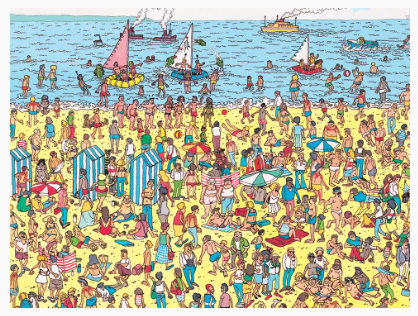

Quay lại với ảnh, những trực giác mà ta đã thảo luận có thể được cụ thể hóa hơn nữa để thu được một vài nguyên tắc chính trong việc xây dựng mạng nơ-ron cho thị giác máy tính:

1. Ở một khía cạnh nào đó, các hệ thống thị giác nên phản ứng tương tự với cùng một vật thể bất kể vật thể đó xuất hiện ở đâu trong ảnh (tính bất biến tịnh tiến).
2. Ở khía cạnh khác, các hệ thống thị giác nên tập trung vào các khu vực cục bộ và không quan tâm đến bất kỳ thứ gì khác ở xa hơn trong ảnh (tính cục bộ).

Hãy cùng xem cách biểu diễn những điều trên bằng ngôn ngữ toán học.


#7.1.2. Ràng buộc Perceptron Đa tầng

Trong phần này, ta coi hình ảnh và các tầng ẩn là các mảng hai chiều. Để bắt đầu, hãy tưởng tượng một perceptron đa tầng sẽ như thế nào với đầu vào là ảnh kích thước$h×w$(biểu diễn dưới dạng ma trận trong toán học và mảng hai chiều khi lập trình), và với các biểu diễn ẩn cũng là các ma trận$/$mảng hai chiều kích thước $h×w$. Đặt $x[i,j$
và $h[i,j]$ lần lượt là điểm ảnh tại vị trí $(i,j)$ của ảnh và biểu diễn ẩn. Để mỗi nút ẩn trong tổng số $h×w$ nút nhận dữ liệu từ tất cả $h×w$ đầu vào, ta sẽ chuyển từ việc biểu diễn các tham số bằng ma trận trọng số (như đã thực hiện với perceptron đa tầng trước đây) sang sử dụng các tensor trọng số bốn chiều.

Ta có thể biểu diễn tầng kết nối đầy đủ bằng công thức toán sau:
$$
h[i, j] = u[i, j] + \sum_{k, l} W[i, j, k, l] \cdot x[k, l] =  u[i, j] +
\sum_{a, b} V[i, j, a, b] \cdot x[i+a, j+b].
$$

Việc chuyển từ $W$ sang $V$ hoàn toàn chỉ có mục đích thẩm mĩ (tại thời điểm này) bởi có một sự tương ứng một-một giữa các hệ số trong cả hai tensor. Ta chỉ đơn thuần đặt lại các chỉ số dưới $(k,l)$ với $k=i+a$ và $l=j+b$. Nói cách khác, $V[i,j,a,b]=W[i,j,i+a,j+b]$. Các chỉ số  a,b chạy trên toàn bộ hình ảnh, có thể mang cả giá trị dương và âm. Với bất kỳ vị trí $(i,j)$ nào ở tầng ẩn, giá trị biểu diễn ẩn $h[i,j]$ được tính bằng tổng trọng số của các điểm ảnh nằm xung quanh vị trí $(i,j)$ của $x$, với trọng số là $V[i,j,a,b]$.

Bây giờ hãy sử dụng nguyên tắc đầu tiên mà ta đã thiết lập ở trên: tính bất biến tịnh tiến. Nguyên tắc này ngụ ý rằng một sự dịch chuyển ở đầu vào $x$ cũng sẽ tạo ra sự dịch chuyển ở biểu diễn ẩn $h$. Điều này chỉ có thể xảy ra nếu $V$ và $u$ không phụ thuộc vào $(i,j)$, tức $V[i,j,a,b]=V[a,b]$ và $u$ là một hằng số. Vì vậy, ta có thể đơn giản hóa định nghĩa của $h$.
$$
h[i, j] = u + \sum_{a, b} V[a, b] \cdot x[i+a, j+b].
$$

Đây là một phép tích chập! Ta đang đánh trọng số cho các điểm ảnh $(i+a,j+b)$ trong vùng lân cận của $(i,j)$ bằng các hệ số $V[a,b]$ để thu được giá trị $h[i,j]$. Lưu ý rằng $V[a,b]$ cần ít hệ số hơn hẳn so với  $V[i,j,a,b]$. Với đầu vào là hình ảnh 1 megapixel (với tối đa 1 triệu hệ số cho mỗi vị trí), lượng tham số của $V[a,b]$ giảm đi 1 triệu vì không còn phụ thuộc vào vị trí trong ảnh. Ta đã có được tiến triển đáng kể!

Bây giờ hãy sử dụng nguyên tắc thứ hai—`tính cục bộ`. Như trình bày ở trên, giả sử rằng ta không cần thông tin tại các vị trí quá xa $(i,j)$ để đánh giá những gì đang diễn ra tại $h[i,j]$. Điều này có nghĩa là ở các miền giá trị $|a|,|b|>Δ$, ta có thể đặt $V[a,b]=0$. Tương tự, ta có thể đơn giản hoá $h[i,j]$ như sau.
$$
h[i, j] = u + \sum_{a = -\Delta}^{\Delta} \sum_{b = -\Delta}^{\Delta} V[a, b] \cdot x[i+a, j+b].
$$

Một cách ngắn gọn, đây chính là biểu diễn toán học của tầng tích chập. Khi vùng cục bộ xung quanh vị trí đang xét (còn được gọi là vùng tiếp nhận) nhỏ, sự khác biệt so với mạng kết nối đầy đủ có thể rất lớn. Trước đây ta có thể phải cần hàng tỷ tham số để biểu diễn một tầng duy nhất trong mạng xử lý ảnh, hiện giờ chỉ cần vài trăm. Cái giá phải trả là các đặc trưng sẽ trở nên bất biến tịnh tiến và các tầng chỉ có thể nhận thông tin cục bộ. Toàn bộ quá trình học dựa trên việc áp đặt các thiên kiến quy nạp (inductive bias). Khi các thiên kiến đó phù hợp với thực tế, ta sẽ có được các mô hình hoạt động hiệu quả với ít mẫu và khái quát tốt cho dữ liệu chưa gặp. Nhưng tất nhiên, nếu những thiên kiến đó không phù hợp với thực tế, ví dụ như nếu các ảnh không có tính bất biến tịnh tiến, các mô hình có thể sẽ không khái quát tốt.



# 7.1.3. Phép tích chập
Hãy cùng xem qua lý do tại sao toán tử trên được gọi là tích chập. Trong toán học, phép tích chập giữa hai hàm số $f,g:Rd→R$ được định nghĩa như sau
$$
[f \circledast g](x) = \int_{\mathbb{R}^d} f(z) g(x-z) dz.
$$

Trong phép toán này, ta đo lường sự chồng chéo giữa $f$ và $g$ khi $g$
được dịch chuyển một khoảng $x$ và “bị lật lại”. Đối với các đối tượng rời rạc, phép tích phân trở thành phép lấy tổng. Chẳng hạn, đối với các vector được định nghĩa trên $ℓ2$, là tập các vector vô hạn chiều có tổng bình phương hội tụ, với chỉ số chạy trên Z, ta có phép tích chập sau:
$$
[f \circledast g](i) = \sum_a f(a) g(i-a).
$$

Đối với mảng hai chiều, ta có một tổng tương ứng với các chỉ số $(i,j)$ cho $f$ và $(i−a,j−b)$ cho $g$. Tổng này nhìn gần giống với định nghĩa tầng tích chập ở trên, nhưng với một khác biệt lớn. Thay vì $(i+a,j+b)$, ta lại sử dụng hiệu. Tuy nhiên, lưu ý rằng sự khác biệt này không phải vấn đề lớn vì ta luôn có thể chuyển về ký hiệu của phép tích chập bằng cách sử dụng  $\tilde{V}[a, b] = V[-a, -b]$ để có $h = x \circledast \tilde{V}$. Cũng lưu ý rằng định nghĩa ban đầu thực ra là của phép toán tương quan chéo. Ta sẽ quay trở lại phép toán này trong phần tiếp theo.




# 7.1.4. Xem lại ví dụ về Waldo

Hãy cùng xem việc xây dựng một bộ phát hiện Waldo cải tiến sẽ trông như thế nào. Tầng tích chập chọn các cửa sổ có kích thước cho sẵn và đánh trọng số cường độ dựa theo mặt nạ  $V$, như được minh họa trong hình dưới. Ta hy vọng rằng ở đâu có “tính Waldo” cao nhất, các tầng kích hoạt ẩn cũng sẽ có cao điểm ở đó.

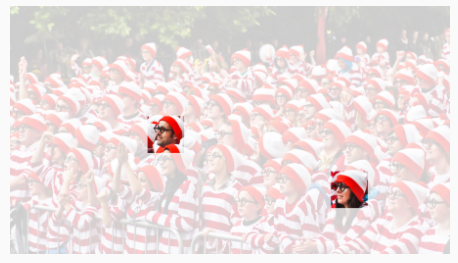

Chỉ có một vấn đề với cách tiếp cận này là cho đến nay ta đã vô tư bỏ qua việc hình ảnh bao gồm 3 kênh màu: đỏ, xanh lá cây và xanh dương. Trong thực tế, hình ảnh không hẳn là các đối tượng hai chiều mà là một tensor bậc ba, ví dụ tensor với kích thước $1024×1024×3$ điểm ảnh. Chỉ có hai trong số các trục này chứa mối quan hệ về mặt không gian, trong khi trục thứ ba có thể được coi như là một biểu diễn đa chiều cho từng vị trí điểm ảnh.

Do đó, ta phải truy cập $x$ dưới dạng $x[i,j,k]$. Mặt nạ tích chập phải thích ứng cho phù hợp. Thay vì $V[a,b]$ bây giờ ta có $V[a,b,c]$.

Hơn nữa, tương tự như việc đầu vào là các tensor bậc ba, việc xây dựng các biểu diễn ẩn là các tensor bậc ba tương ứng hoá ra cũng là một ý tưởng hay. Nói cách khác, thay vì chỉ có một biểu diễn 1D tương ứng với từng vị trí không gian, ta muốn có một biểu diễn ẩn đa chiều tương ứng với từng vị trí không gian. Ta có thể coi các biểu diễn ẩn như được cấu thành từ các lưới hai chiều xếp chồng lên nhau. Đôi khi chúng được gọi là kênh (channel) hoặc ánh xạ đặc trưng (feature map). Theo trực giác, bạn có thể tưởng tượng rằng ở các tầng thấp hơn, một số kênh tập trung vào việc nhận diện cạnh trong khi các kênh khác đảm nhiệm việc nhận diện kết cấu, v.v. Để hỗ trợ đa kênh ở cả đầu vào và kích hoạt ẩn, ta có thể thêm tọa độ thứ tư vào $V:V[a,b,c,d]$. Từ mọi điều trên, ta có:

$$
h[i, j, k] = \sum_{a = -\Delta}^{\Delta} \sum_{b = -\Delta}^{\Delta} \sum_c V[a, b, c, k] \cdot x[i+a, j+b, c].
$$

Đây là định nghĩa của một tầng mạng nơ-ron tích chập. Vẫn còn nhiều phép toán mà ta cần phải giải quyết. Chẳng hạn, ta cần tìm ra cách kết hợp tất cả các giá trị kích hoạt thành một đầu ra duy nhất (ví dụ đầu ra cho: có Waldo trong ảnh không). Ta cũng cần quyết định cách tính toán mọi thứ một cách hiệu quả, cách kết hợp các tầng với nhau và liệu có nên sử dụng thật nhiều tầng hẹp hay chỉ một vài tầng rộng. Tất cả những điều này sẽ được giải quyết trong phần còn lại của chương.